In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

In [2]:
def generate_data(n_points=100, train_test_split=.2, type="normal"):

    bias = np.ones((n_points))


    X = np.random.uniform(low=0, high=100, size=n_points)
    W = 2
    
    noise = np.random.normal(size=(n_points))
    noise_std = 10
    
    if type=="normal":
        Y = W * X + bias + (noise * noise_std)
    if type == "polynomial":
        
        a = .01
        b = .1
        c = 2
        Y = a*X**3 + b*X**2 + c*X
    if type=="sine":
        # X = np.linspace(0, 10,  100)
        X = np.random.uniform(low=0, high=10, size=n_points)
        # X = np.arange(0, 10,  0.01)
        Y = np.sin(X)
    n_test = int(n_points * train_test_split)
    n_train = n_points - n_test
    
    X_train = X[:n_train]
    Y_train = Y[:n_train]

    X_test = X[n_train:]
    Y_test = Y[n_train:]

    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test  = generate_data(n_points=1000)

print(X_train.shape, Y_train.shape)

(800,) (800,)


In [3]:
# simple linear regression
# w = (X^t * X ) ^-1 * X^T * y
def lin_regerssor(X_train, Y_train):
  
  state1 = np.dot(X_train.reshape((-1, 1)).T, X_train.reshape((-1, 1)))
  state2 = np.linalg.inv(state1)
  state3 = np.dot(state2, X_train.reshape((-1, 1)).T)
  w = np.dot(state3, Y_train)
  return w

w = lin_regerssor(X_train, Y_train)
# w = np.dot(np.dot(np.linalg.inv(np.dot(X_train, X_train)), X_train), Y_train)
w

array([2.01945492])

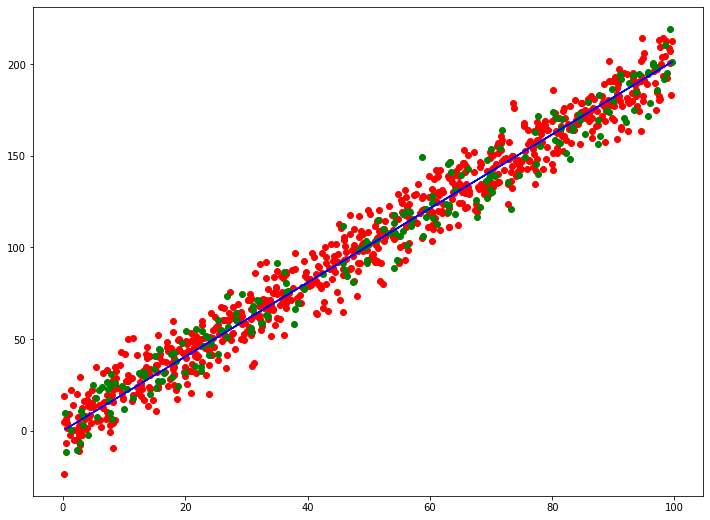

In [4]:
fig, ax = plt.subplots()

ax.scatter(X_train[:], Y_train[:], c='red')
ax.scatter(X_test, Y_test, c='green')
ax.plot(X_test, w * X_test, c="blue")
plt.show()

In [45]:
X_norm = np.sum(X_train[:, None] ** 2, axis= -1)
k =np.exp(-(X_norm[:, None] + X_norm[None, :] - 2 *np.dot(X_train[:, None], X_train[:, None].T) ) / (2 * 1 **2))

print(k.trace())

800.0


In [82]:
def cal_rbf_kernel(X_train, X_test=None, s=.5):
  if X_test is None:
    X_test = X_train.copy()

  X_train_norm = np.sum(X_train[:, None] ** 2, axis=-1)
  X_test_norm = np.sum(X_test[:, None] **2, axis=-1)

  print(X_train_norm.shape)
  K =np.exp(-(X_train_norm[:, None] + X_test_norm[None, :] - 2 *np.dot(X_train[:, None], X_test[:, None].T) ) / (2 * s **2))

  return K

print(cal_rbf_kernel(X_train))

(800,)
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 ... 6.03488808e-209
  8.28519994e-092 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 ... 1.76553556e-080
  1.26392551e-191 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 6.80062489e-279]
 ...
 [6.03488808e-209 1.76553556e-080 0.00000000e+000 ... 1.00000000e+000
  1.33565920e-024 0.00000000e+000]
 [8.28519994e-092 1.26392551e-191 0.00000000e+000 ... 1.33565920e-024
  1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 6.80062489e-279 ... 0.00000000e+000
  0.00000000e+000 1.00000000e+000]]


In [101]:
def kernel_regressor(X_train, Y_train, X_test, k_type="linear"):
  X_train = X_train[:, None]  
  X_test = X_test[:, None]  
  Y_train = Y_train[:, None]  

  if k_type == "linear":
    # linear kernel
    kernel = np.dot(X_train.T, X_train)
    print(kernel)
    alpha = np.dot(np.linalg.inv(kernel), Y_train.T)
    y_predict = np.dot(np.dot(X_test,X_train.T), alpha.T)
    
  if k_type == "rbf":
  
    # RBF Kernel
    X_norm = np.sum(X_train ** 2)
    # print(f"norm: {X_norm}, shape: {X_norm.shape}")
    X_test_norm = np.sum(X_test ** 2)
    sigma = 1 # how wide the kernel is 
    gamma = 1 / (2 * sigma**2)
    # print(np.dot(X_train, X_train.T))
    print(np.linalg.norm(X_train, ord=2))
    # kernel= np.exp(- gamma * (np.linalg.norm(X_train, 2) + np.linalg.norm(X_train) + - 2 * np.dot(X_train.T, X_train)))
    
    # kernel= np.exp(- gamma * (X_norm + X_norm + - 2 * np.dot(X_train.T, X_train)))
    kernel = cal_rbf_kernel(X_train.squeeze())
    
    # print(f"kernel shape {kernel.shape}")
    # print(f"kernel: {kernel}")
    l = 0
    alpha = np.dot(np.linalg.inv(kernel + .5 * np.identity(K.shape[0])), Y_train)
    total_norm = X_norm + X_test_norm
    # print(f"alpha shape: {alpha.shape}")
    # print(f"alpha: {alpha}")
    # n_dot = np.dot(X_test, X_train)
    # y_predict = np.dot(alpha, np.sum(np.exp(-gamma * (total_norm.T - 2 * np.dot(X_test, X_train.T))), axis=1))
    
    y_predict = np.dot(cal_rbf_kernel(X_train.squeeze(), X_test.squeeze()).T, alpha)
    # y_predict =np.dot(alpha, np.exp(-gamma * (X_norm + X_test_norm - 2 * np.dot(X_train, X_test.T))))
    
    # # y_predict = np.dot(np.dot(X_test,X_train.T), alpha.T)
    # fig, ax = plt.subplots()
    # ax.plot(alpha.squeeze())
    # plt.show()
    
    kernel = (np.dot(X_train, X_train.T) + 1)**2
    print(f"poly kernel: {kernel.shape}")
    alpha = np.dot(np.linalg.inv(kernel), Y_train)
    y_predict = np.dot((np.dot(X_test,X_train.T) + 1)**2, alpha)
  

  return y_predict



# y_predict = np.dot(alpha, np.dot(X_test[:, None].T,X_train[:, None] ))
y_predict = kernel_regressor(X_train, Y_train, X_test, k_type="rbf")
# print(y_predict.shape)
# print(y_predict)

1599.2002603684778
(800,)
(800,)
poly kernel: (800, 800)


from sklearn.svm import SVR
k_test = np.sum(X_train ** 2)
print(k_test.shape)
# k_test = np.sum(X_train **2) * np.ones()

k_test = np.exp( - (1 / (2 * 1 ** 2)) * (np.linalg.norm(X_train[:, None]) + np.linalg.norm(X_test[:, None]) - 2 * np.dot(X_train[:, None], X_test[:, None].T)))
print(k_test.shape)
y_predict = np.dot(k_test.T, alpha)
print(y_predict.shape)
# y_predict = np.dot(alpha, np.dot(X_train.reshape((-1, 1)), X_test.reshape((-1, 1)).T))

clf = SVR(kernel="rbf")
clf.fit(X_train.reshape((-1, 1)), Y_train.reshape((-1, 1)))
y_predict = clf.predict(X_test.reshape((-1, 1)))

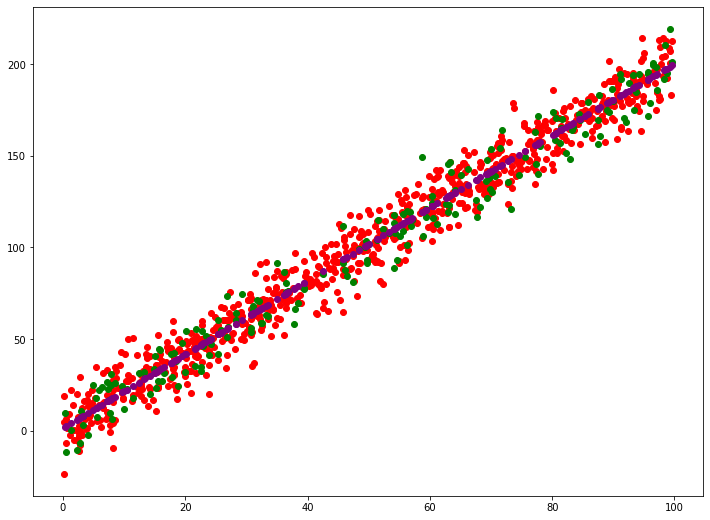

In [102]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(kernel="poly")
# kr = KernelRidge(kernel="rbf", gamma=1)
kr.fit(X_train[:, None], Y_train[:, None])
fig, ax = plt.subplots()

ax.scatter(X_train[:], Y_train[:], c='red')
ax.scatter(X_test, Y_test, c='green')
ax.scatter(X_test, kr.predict(X_test[:, None]) , c='purple')
# ax.scatter(X_test, y_predict, c='purple')
plt.show()

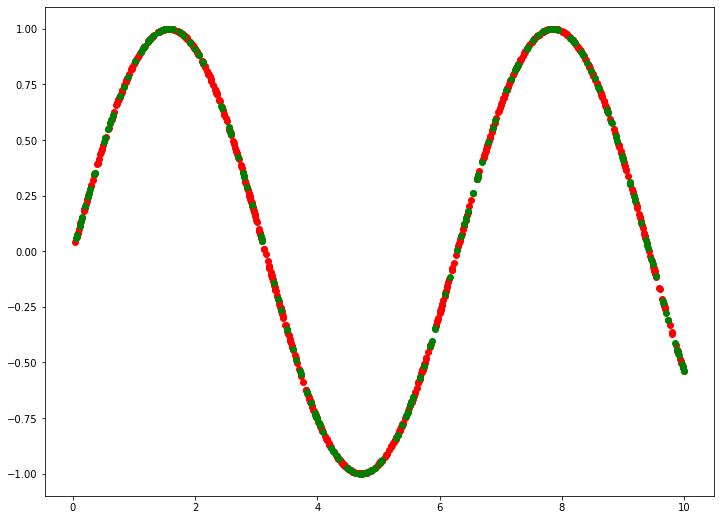

In [103]:
X_train, Y_train, X_test, Y_test = generate_data(type="sine", n_points=1000)
fig, ax = plt.subplots()

ax.scatter(X_train[:], Y_train[:], c='red')
ax.scatter(X_test, Y_test, c='green')
plt.show()

159.05923366466504
(800,)
(800,)
poly kernel: (800, 800)


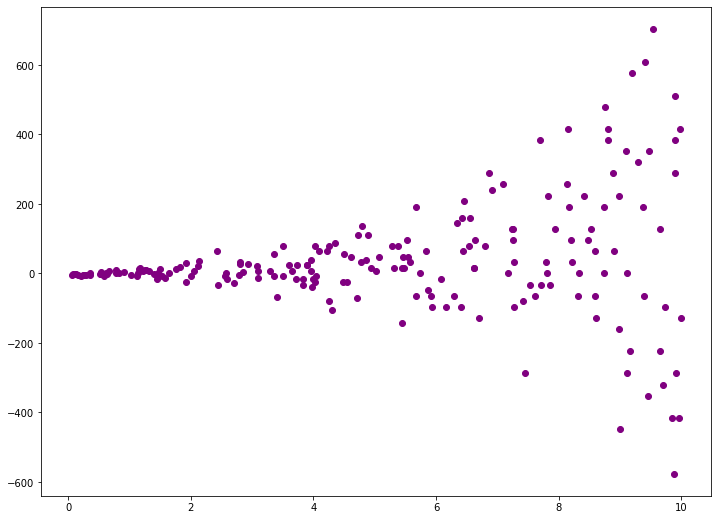

In [104]:

y_predict = kernel_regressor(X_train, Y_train, X_test, k_type="rbf")
fig, ax = plt.subplots()
# ax.scatter(X_train[:], Y_train[:], c='red')
# ax.scatter(X_test, Y_test, c='green')
ax.scatter(X_test, y_predict , c='purple')
plt.show()

In [105]:
from sklearn.gaussian_process.kernels import RBF

kernel = RBF()
kernel

RBF(length_scale=1)

In [106]:
def kernelf_gaussian(x, z=None, ls=1.0):
    """Compute kernel matrix with Gaussian kernel.
    
    Args:
        x: iterable, row of kernel matrix
        z: (optional) iterable, column of kernel matrix. if None, use x
        ls: length scale
    
    """
    if z is None:
        z = x

    return np.array([[np.exp(-(this_x-this_z)**2 / (2 * ls ** 2)) for this_z in z] for this_x in x])

K = kernelf_gaussian(X_train)
K.shape
print(K.trace())

800.0


In [116]:
# alpha = np.linalg.inv(K + .5 * np.identity(K.shape[0])) @ Y_train
alpha = np.linalg.inv(K + 20 * np.identity(K.shape[0])) @ Y_train
alpha.shape


(800,)

In [117]:
predict = np.dot(kernelf_gaussian(X_train, z=X_test).T, alpha)

predict.shape


(200,)

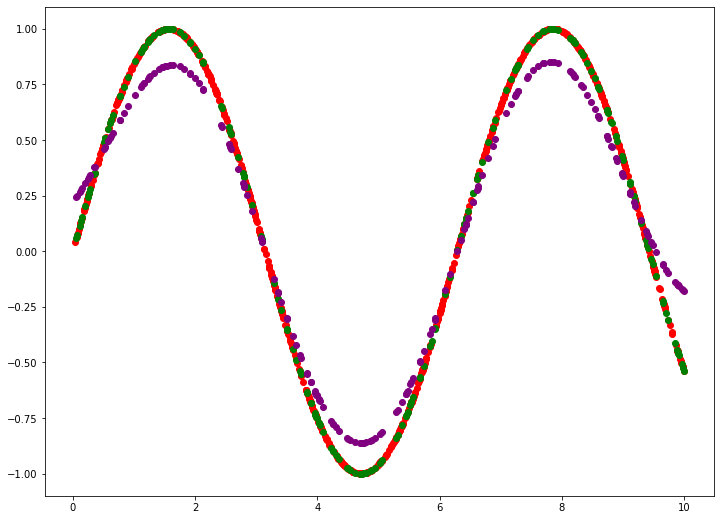

In [118]:
fig, ax = plt.subplots()

ax.scatter(X_train[:], Y_train[:], c='red')
ax.scatter(X_test, Y_test, c='green')
ax.scatter(X_test, predict , c='purple')
plt.show()